In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [2]:
#Reading Datasets
cabdata= pd.read_csv('Cab_Data.csv')
city =pd.read_csv('City.csv')
customerid=pd.read_csv('Customer_ID.csv')
transid=pd.read_csv('Transaction_ID.csv')

In [3]:
print(cabdata.shape)
cabdata.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
cabdata['Date of Travel'] = pd.to_datetime(cabdata['Date of Travel'], format='%d-%m-%Y')

In [6]:
cabdata.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [7]:
cabdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [8]:
print(city.shape)
city.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
city.describe().T

,count,unique,top,freq
City,20,20,BOSTON MA,1
Population,20,20,"671,238",1
Users,20,20,"3,643",1


In [11]:
print(customerid.shape)
customerid.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
customerid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
customerid.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [14]:
print(transid.shape)
transid.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
transid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [16]:
#Data Marge
masterdata = cabdata.merge(transid, on= 'Transaction ID').merge(customerid, on ='Customer ID').merge(city, on = 'City')
print(masterdata.shape)
masterdata.head()

(359392, 14)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [17]:
masterdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [18]:
duplicated_rows = masterdata[masterdata.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


In [19]:
masterdata['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [20]:
masterdata['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [21]:
masterdata['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

In [22]:
masterdata['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

Text(0.5, 0, 'Km Travelled')

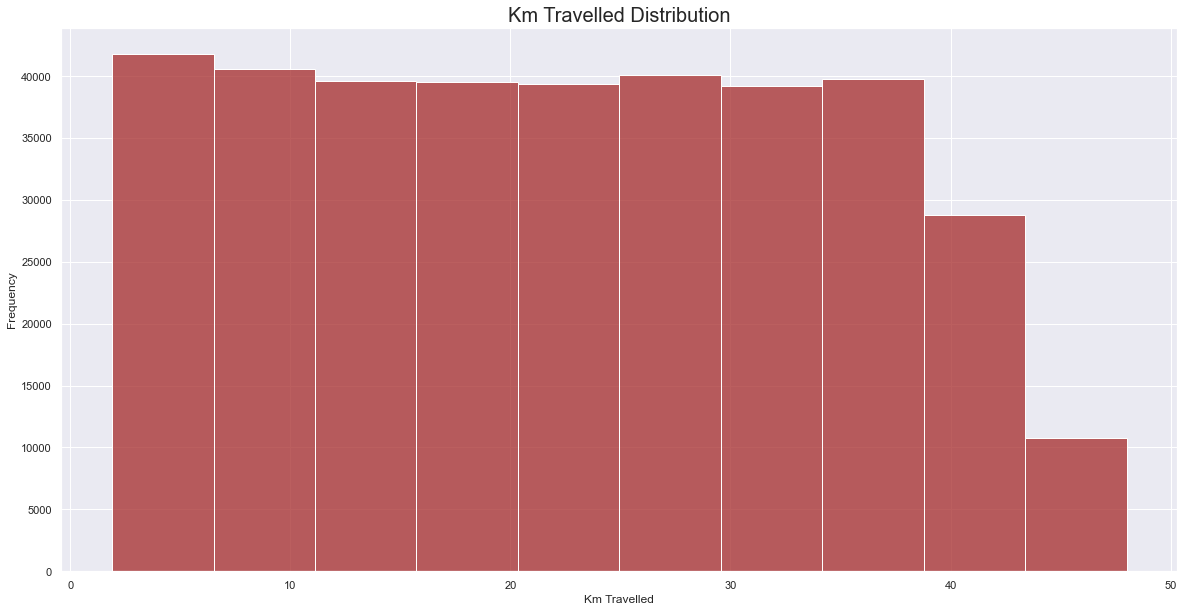

In [23]:
plt.figure(figsize=(20,10))
ax=sns.histplot(data=masterdata, x="KM Travelled",bins=10, color= 'brown')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Text(0.5, 0, 'Price Charged')

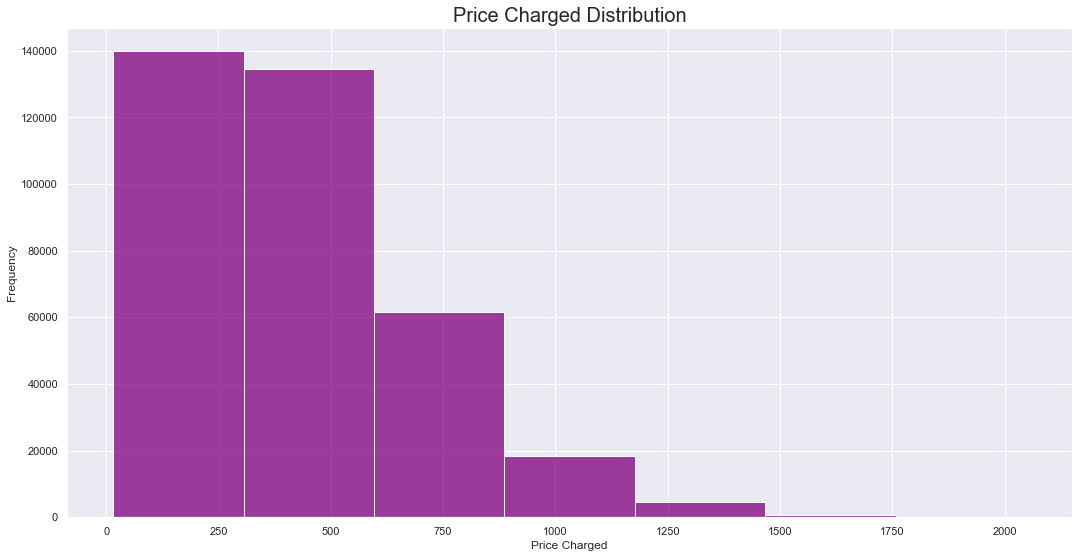

In [24]:
plt.figure(figsize=(18,9))
sns.histplot(data=masterdata, x="Price Charged",bins=7 , color= 'purple')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Cost of Trip')

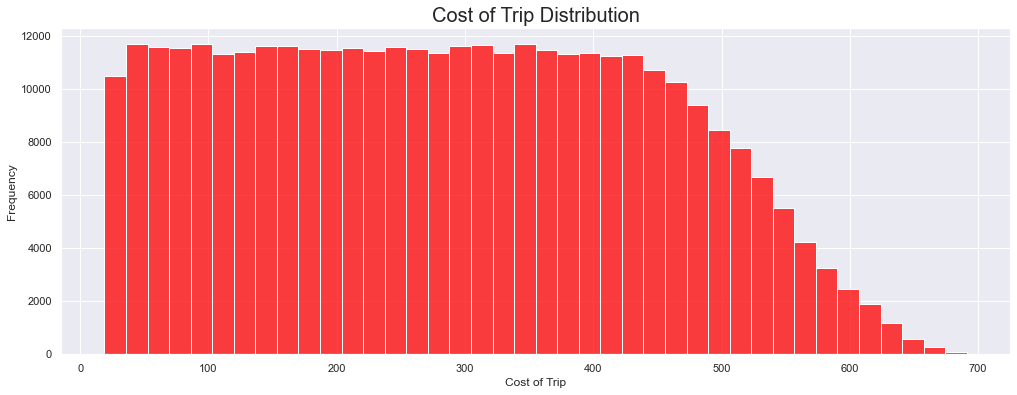

In [25]:
plt.figure(figsize=(17,6))
sns.histplot(data= masterdata,x="Cost of Trip",bins=40 , color= 'red')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Income (USD/Month)')

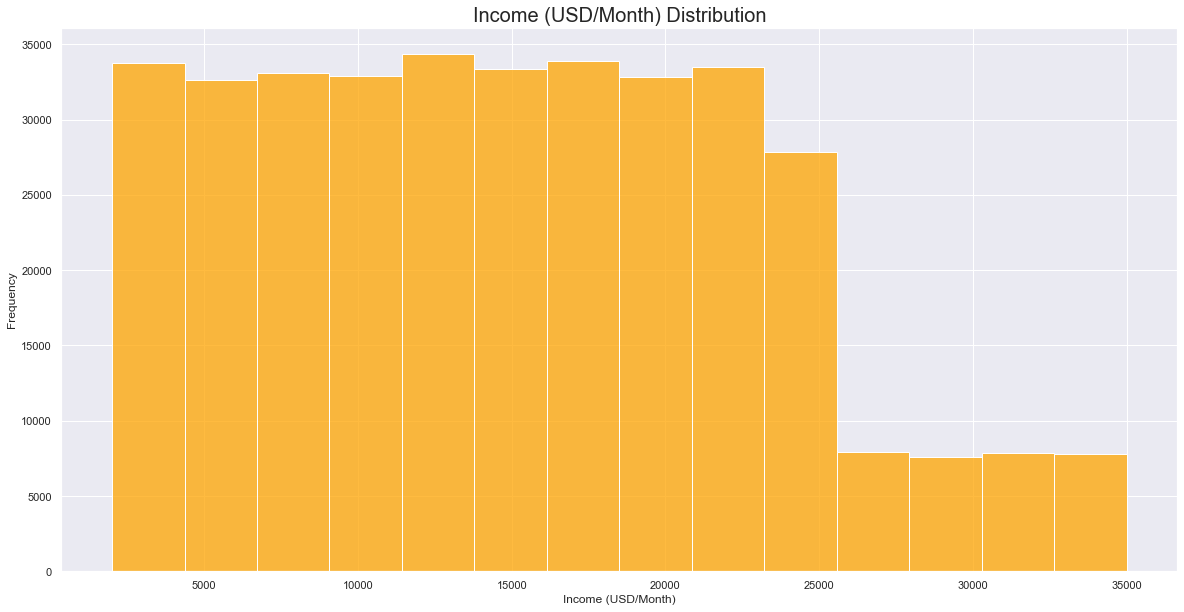

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(data= masterdata,x="Income (USD/Month)",bins=14 , color= 'orange')
plt.title('Income (USD/Month) Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Income (USD/Month)')

Text(0.5, 0, 'Age')

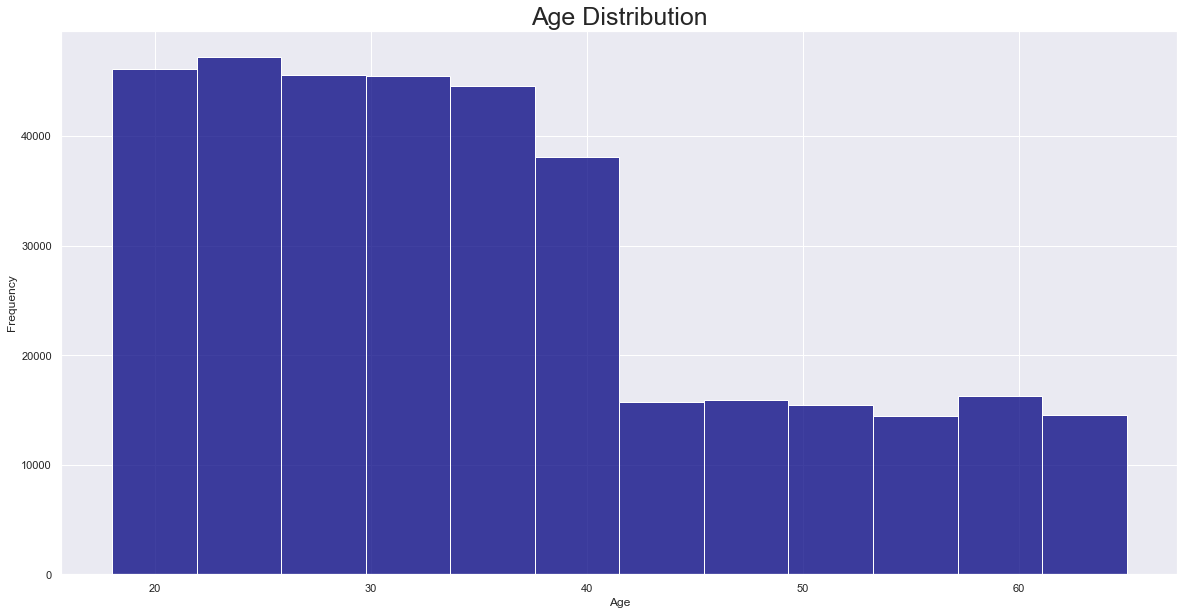

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(data=masterdata, x='Age', bins=12, color='navy')
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')

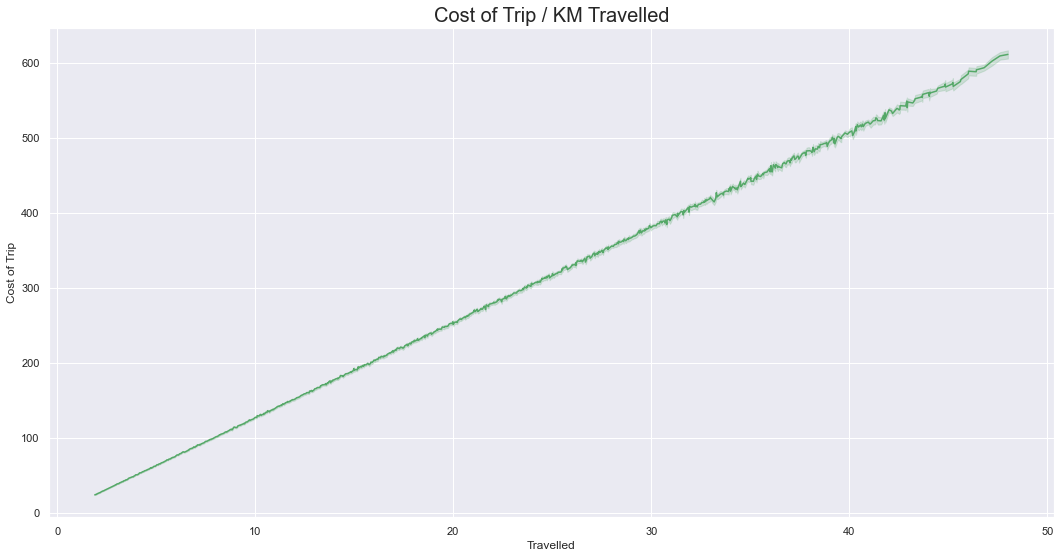

In [28]:
plt.figure(figsize=(18,9))
sns.lineplot(data=masterdata, x="KM Travelled",y='Cost of Trip', color= 'g')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost of Trip')
plt.show()

Text(0.5, 0, 'Payment Mode')

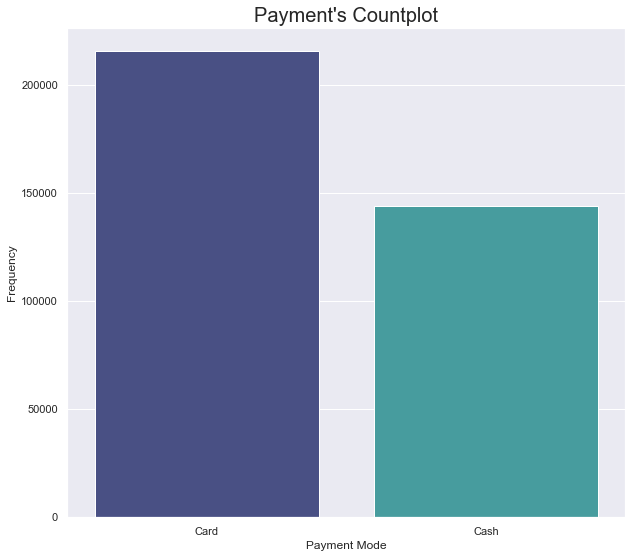

In [29]:
plt.figure(figsize=(10,9))
sns.countplot(data=masterdata, x="Payment_Mode", palette='mako')
plt.title("Payment's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')


Male      205912
Female    153480
Name: Gender, dtype: int64


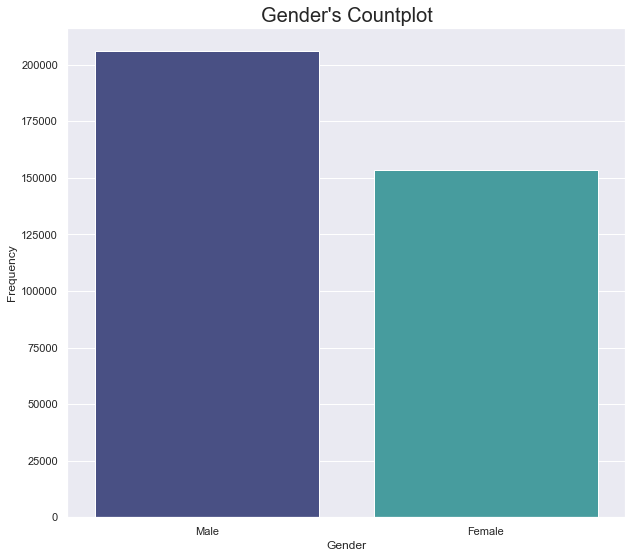

In [30]:
plt.figure(figsize=(10,9))
sns.countplot(data=masterdata, x="Gender", palette='mako')
plt.title("Gender's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Gender')
print(masterdata['Gender'].value_counts())

Text(0.5, 0, 'Company')

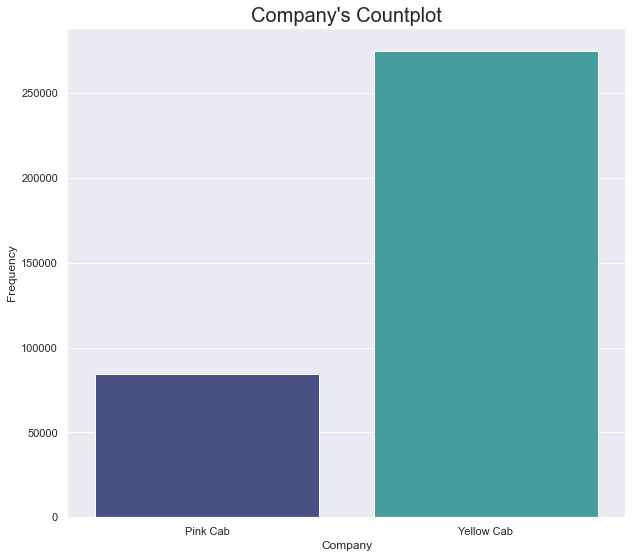

In [31]:
plt.figure(figsize=(10,9))
sns.countplot(data=masterdata, x="Company", palette='mako')
plt.title("Company's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Company')

Text(0.5, 0, 'City')

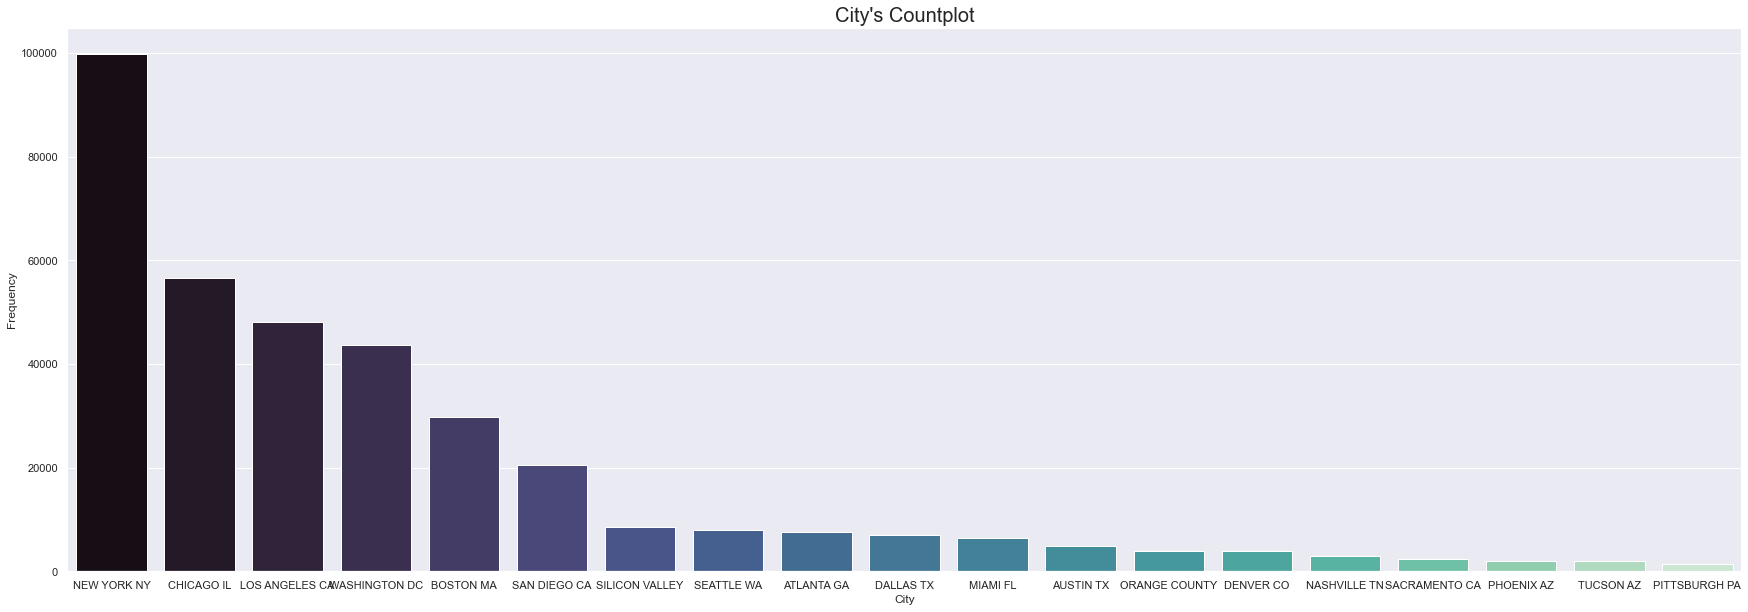

In [32]:
plt.figure(figsize=(30,10))
sns.countplot(data=masterdata, x="City", palette='mako', order = masterdata['City'].value_counts().index)
plt.title("City's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('City')

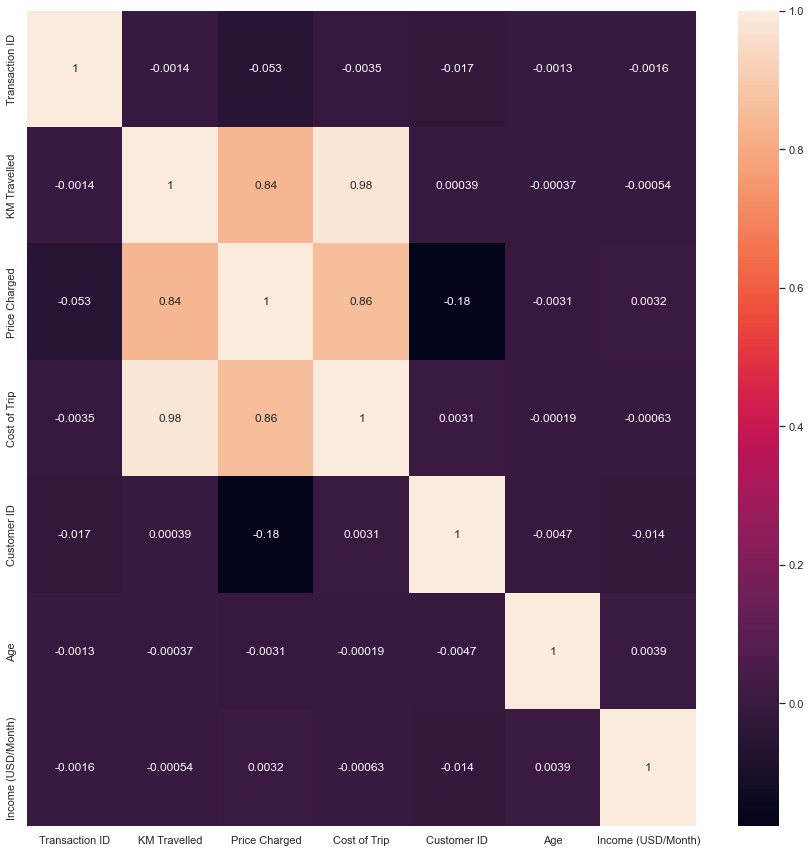

In [33]:
corrMatrix = masterdata.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

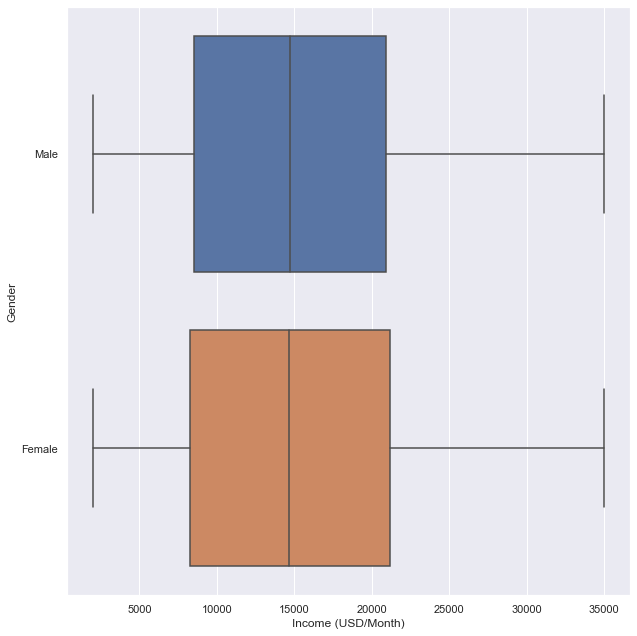

In [34]:
#OutLiers
plt.figure(figsize=(17,9))

plt.subplot(1,2,2)
sns.boxplot(data = masterdata, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

In [35]:
#Preparing the data for Time Series Analysis
masterdata['Year of Travel'] = masterdata['Date of Travel'].dt.year
masterdata['Month of Travel'] = masterdata['Date of Travel'].dt.month
masterdata['Day of Travel'] = masterdata['Date of Travel'].dt.day
masterdata['Profit'] = masterdata['Price Charged'] -masterdata['Cost of Trip']

masterdata_st=masterdata.set_index('Date of Travel')

masterdata_st.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-02,10000429,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,34,16558,"248,968","80,021",2016,1,2,137.1860
2016-01-02,10000525,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,19,6316,"1,955,130","164,468",2016,1,2,25.0484
2016-01-02,10001234,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,36,6577,"671,238","25,063",2016,1,2,577.9420
2016-01-02,10001311,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,53048,Card,Male,23,31566,"418,859","127,001",2016,1,2,233.9280
2016-01-02,10000927,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,1808,Cash,Male,59,18999,"8,405,837","302,149",2016,1,2,635.8876


In [36]:
#Splitting the dataset into two datasets one for each company
yellowcabst= masterdata_st[masterdata_st.Company.isin(['Yellow Cab'])]
print(yellowcabst.shape)
yellowcabst.head()
yellowcab= masterdata[masterdata.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()

(274681, 17)
(274681, 18)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,21,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,23,194.6480
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,21,253.9808
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",2018,5,4,50.8912
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",2016,9,21,210.0920


In [37]:
pinkcabst= masterdata_st[masterdata_st.Company.isin(['Pink Cab'])]
print(pinkcabst.shape)
pinkcabst.head()
pinkcab= masterdata[masterdata.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(84711, 17)
(84711, 18)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",2016,1,8,57.315
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",2016,1,6,23.666
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,"814,885","24,701",2018,10,27,25.096
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",2016,1,2,27.568
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",2016,1,7,25.798


In [38]:
#Profit Analysis
q=masterdata.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
q.head()

Profit
Company    Year of Travel              
Pink Cab   2016            1.713511e+06
           2017            2.033655e+06
           2018            1.560162e+06
Yellow Cab 2016            1.392700e+07
           2017            1.657598e+07

In [39]:
w=masterdata.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')
w.head()

Price
Company    Year of Travel             
Pink Cab   2016             7908479.23
           2017             9578629.54
           2018             8841142.56
Yellow Cab 2016            38481133.18
           2017            45818910.04

In [40]:
w['%Profit'] =(q['Profit']*100) /w['Price']
w.head(6)

Price    %Profit
Company    Year of Travel                        
Pink Cab   2016             7908479.23  21.666760
           2017             9578629.54  21.231168
           2018             8841142.56  17.646613
Yellow Cab 2016            38481133.18  36.191750
           2017            45818910.04  36.177155
           2018            41553843.97  32.529842

In [41]:
y=yellowcabst.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)
p=pinkcabst.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print(ypy)
print(ppy)
y=yellowcabst.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pinkcabst.Profit.resample('m').sum()
ppm= pd.DataFrame(p)

                      Profit
Date of Travel              
2016-12-31      1.392700e+07
2017-12-31      1.657598e+07
2018-12-31      1.351740e+07
                     Profit
Date of Travel             
2016-12-31      1713511.224
2017-12-31      2033654.908
2018-12-31      1560162.189


In [42]:
ypy['ProfitORides']= ypy['Profit']/yellowcab['Date of Travel'].value_counts().resample('Y').sum()
ppy['ProfitORides']= ppy['Profit']/pinkcab['Date of Travel'].value_counts().resample('Y').sum()
ypm['ProfitORides']= ypm['Profit']/yellowcab['Date of Travel'].value_counts().resample('m').sum()
ppm['ProfitORides']= ppm['Profit']/pinkcab['Date of Travel'].value_counts().resample('m').sum()
ypy['ProfitOKM']= ypy['Profit']/yellowcabst['KM Travelled'].resample('Y').sum()
ppy['ProfitOKM']= ppy['Profit']/pinkcabst['KM Travelled'].resample('Y').sum()
ypm['ProfitOKM']= ypm['Profit']/yellowcabst['KM Travelled'].resample('m').sum()
ppm['ProfitOKM']= ppm['Profit']/pinkcabst['KM Travelled'].resample('m').sum()

In [43]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

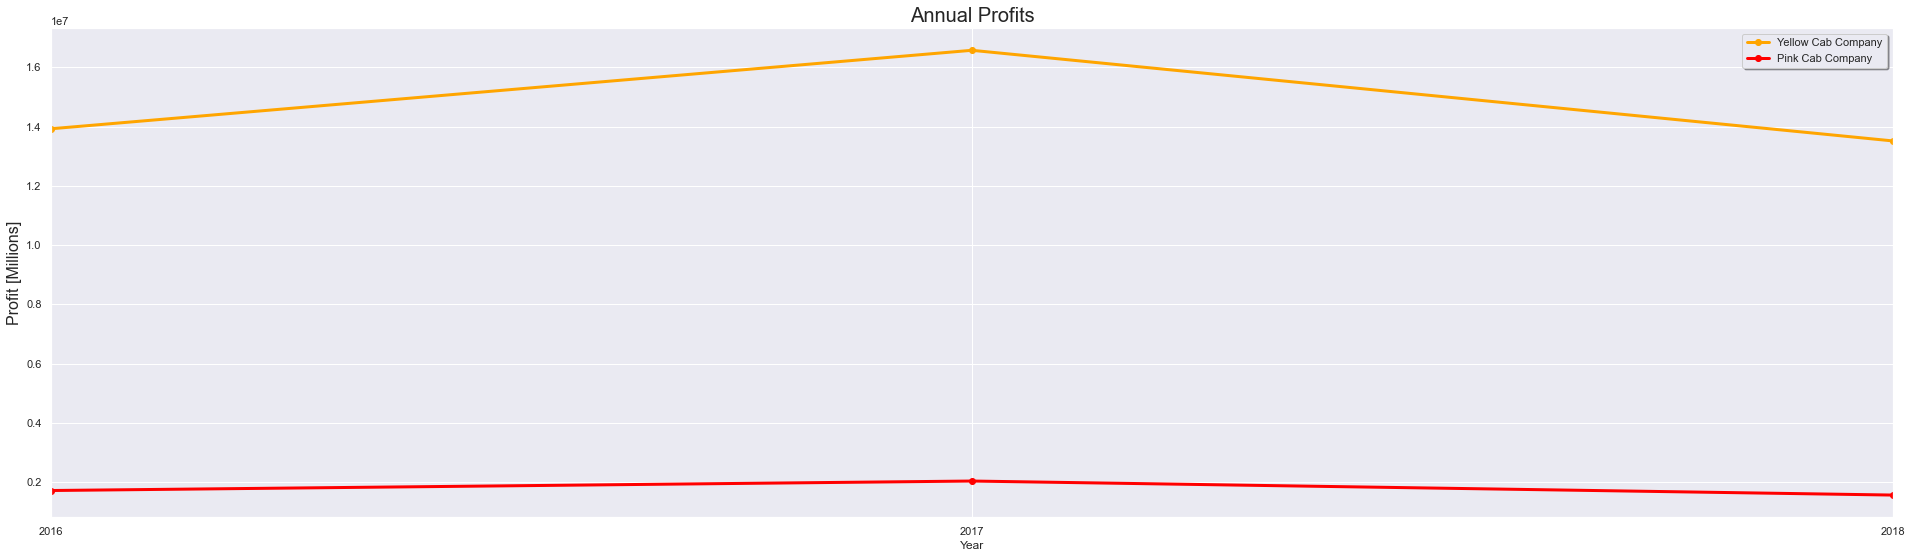

In [44]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('Y').sum().plot.line(color = 'orange',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pinkcabst.Profit.resample('Y').sum().plot.line(color = 'red',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)

In [45]:
round(masterdata.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


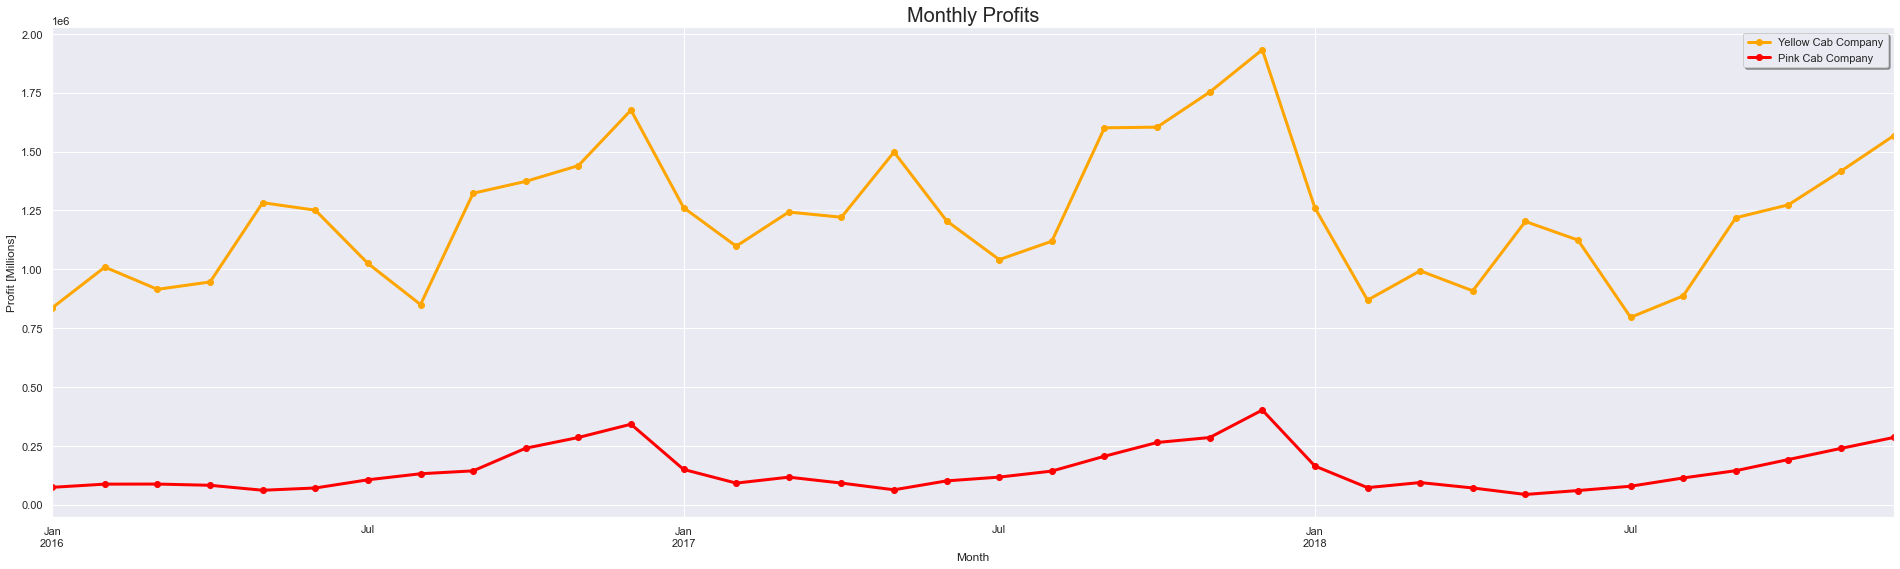

In [46]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('m').sum().plot.line(color = 'orange',label='Yellow Cab Company',linewidth=3, marker ='o')
fig=pinkcabst.Profit.resample('m').sum().plot.line(color = 'red',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

In [47]:
dpm=masterdata.groupby(['Company','Month of Travel'])['Profit'].sum().to_frame('Profit')
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)
y=yellowcabst.Profit.resample('m').sum().to_frame('Profit')
p=pinkcabst.Profit.resample('m').sum().to_frame('Profit')
print('YellowCab Company mean monthly profit = ', round(y.Profit.mean(),1),"\nand it's std deviation is = ",round(y.Profit.std(),2), '\nso, the percentage of the deviation is', round((y.Profit.std() /y.Profit.mean())*100,2),'%')
print('PinkCab Company mean monthly profit = ', round(p.Profit.mean(),1),"\nand it's std deviation is = ",round(p.Profit.std(),2), '\nso, the percentage of the deviation is', round((p.Profit.std() /p.Profit.mean())*100,2),'%')

YellowCab Company mean monthly profit =  1222788.1 
and it's std deviation is =  282089.04 
so, the percentage of the deviation is 23.07 %
PinkCab Company mean monthly profit =  147425.8 
and it's std deviation is =  90063.97 
so, the percentage of the deviation is 61.09 %


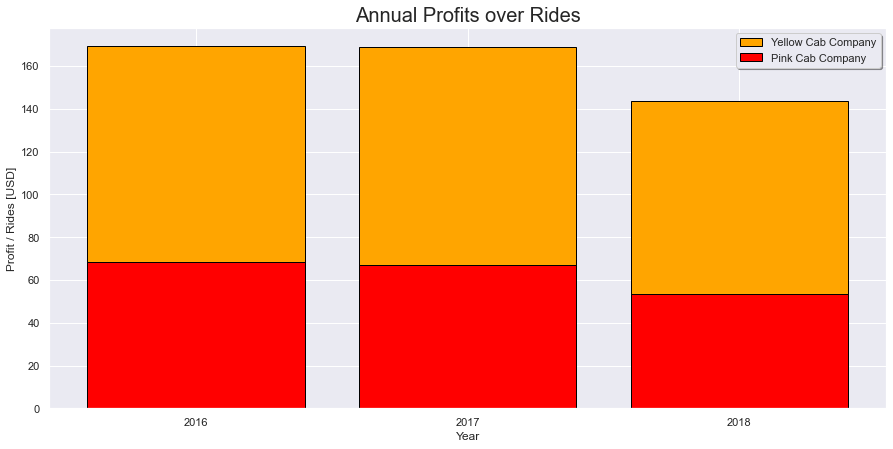

In [48]:
#Profit per Ride
plt.figure(figsize=(15,7))
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = ypy,color = 'orange',edgecolor = 'black',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = ppy, color = 'red',edgecolor = 'black',label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

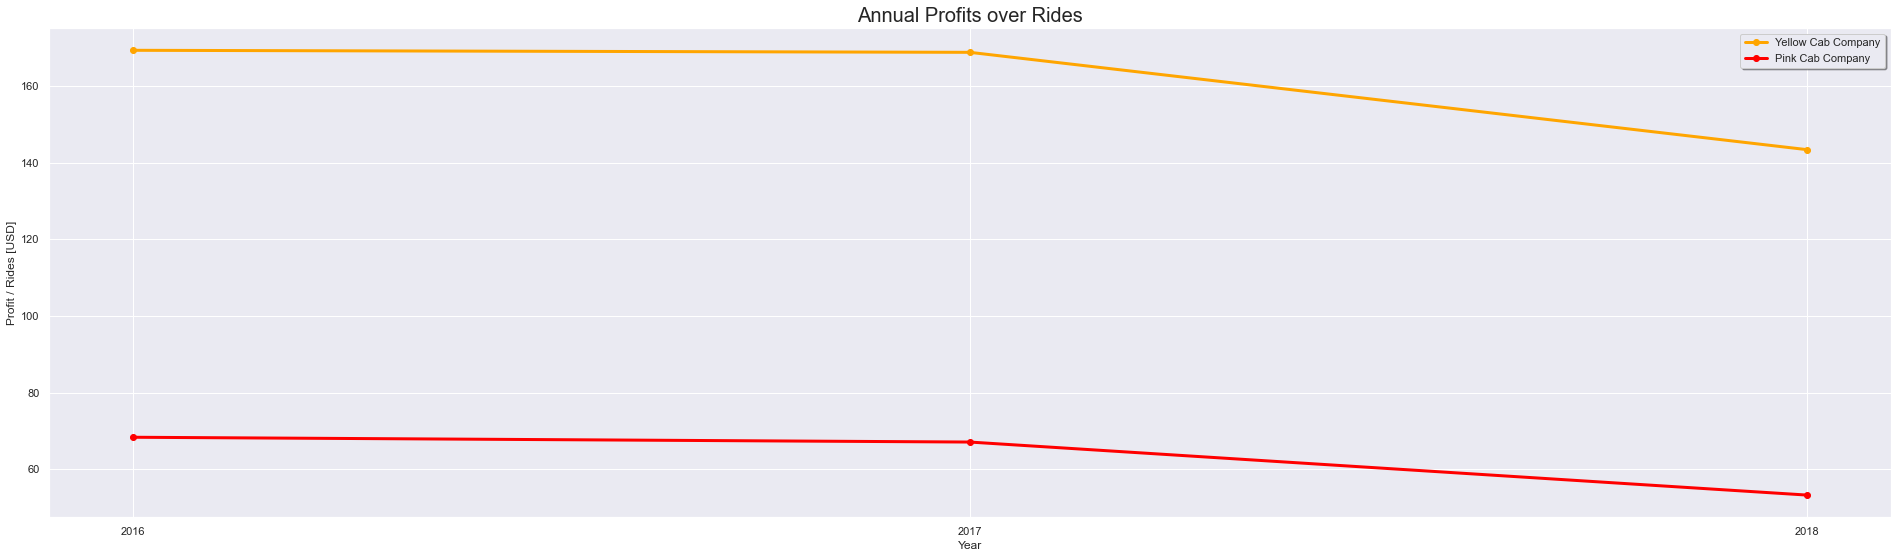

In [49]:
plt.figure(figsize=(33,9))
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'ProfitORides', data = ypy,color = 'orange',label='Yellow Cab Company',linewidth=3, marker = 'o')
plt.plot(x2.index.strftime('%Y'),'ProfitORides', data = ppy, color = 'red',label='Pink Cab Company',linewidth=3, marker='o')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)


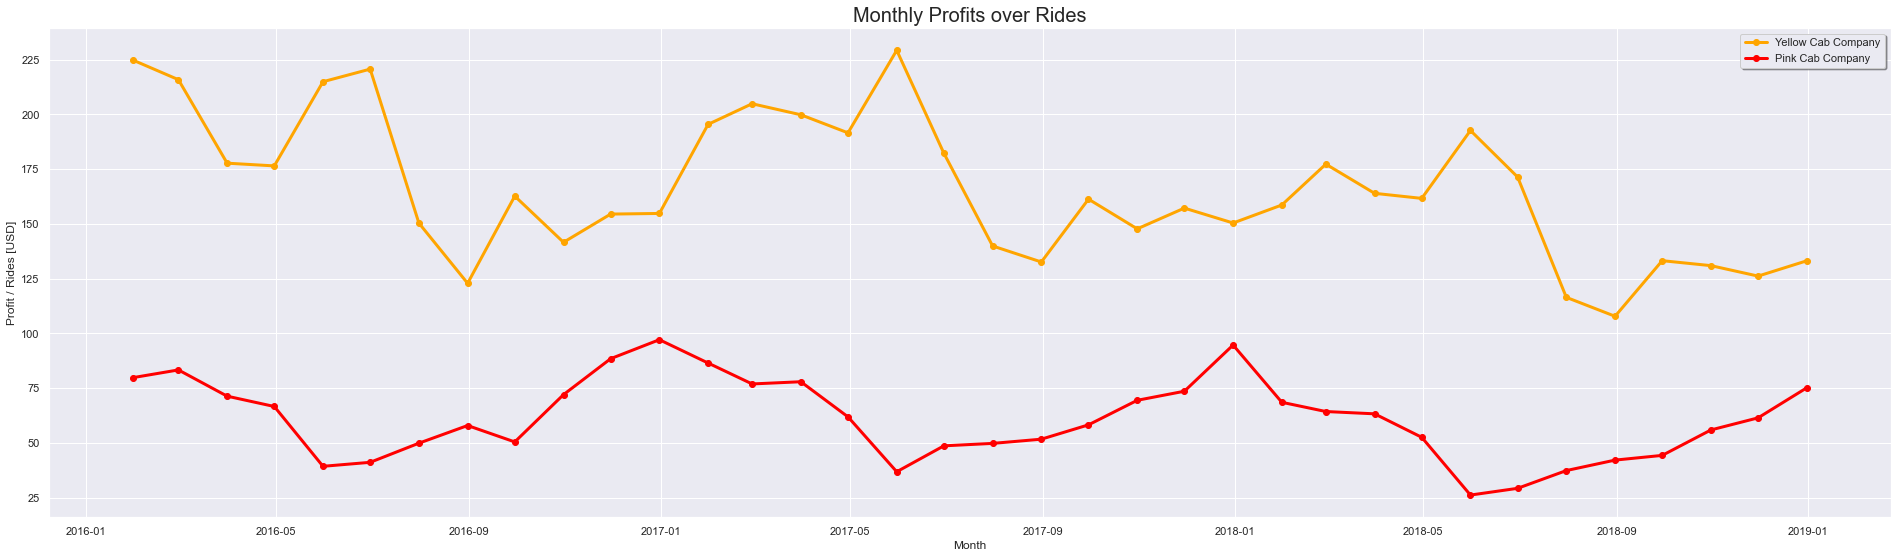

In [50]:
lista=[1,2,3,4,5,6,7,8,9,10,11,12]
lista=lista*3

plt.figure(figsize=(33,9))

x1= ypm.ProfitORides.resample('m').sum()
x2= ppm.ProfitORides.resample('m').sum()
plt.plot(x1.index,'ProfitORides', data = ypm,color = 'orange', linewidth = 3,label='Yellow Cab Company', marker='o')
plt.plot(x2.index,'ProfitORides', data = ppm, color = 'red',linewidth = 3,label='Pink Cab Company', marker='o')
plt.xticks(rotation=0)
plt.title('Monthly Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)


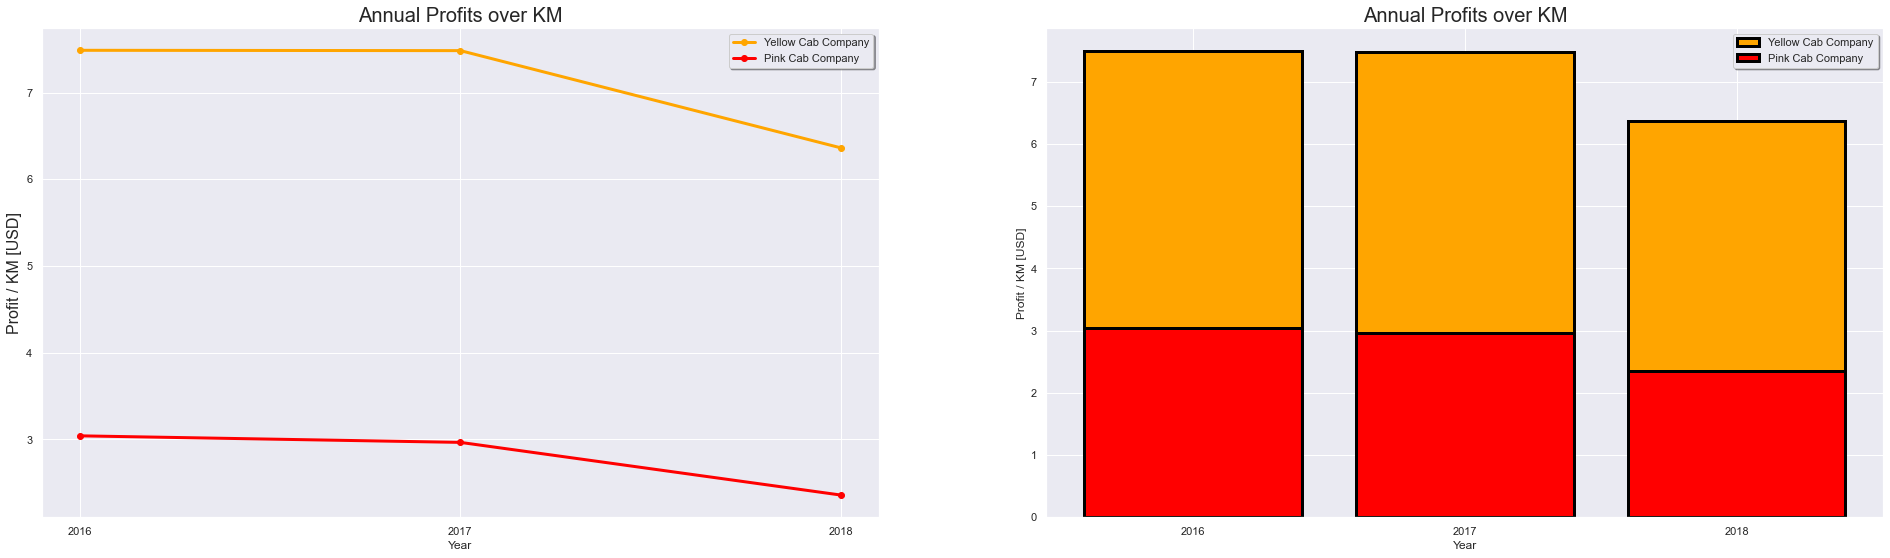

In [51]:
##
#Average profits per KM
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitOKM', data = ypy,color = 'orange',edgecolor = 'black',label='Yellow Cab Company',linewidth=3)
plt.bar(x= x2.index.strftime('%Y'), height='ProfitOKM', data = ppy, color = 'red',edgecolor = 'black',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.ylabel('Profit / KM [USD]', fontsize=16)
plt.plot(x1.index.strftime('%Y'),'ProfitOKM', data = ypy,color = 'orange',label='Yellow Cab Company',linewidth=3,marker='o')
plt.plot(x2.index.strftime('%Y'),'ProfitOKM', data = ppy, color = 'red',label='Pink Cab Company',linewidth=3,marker='o')
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

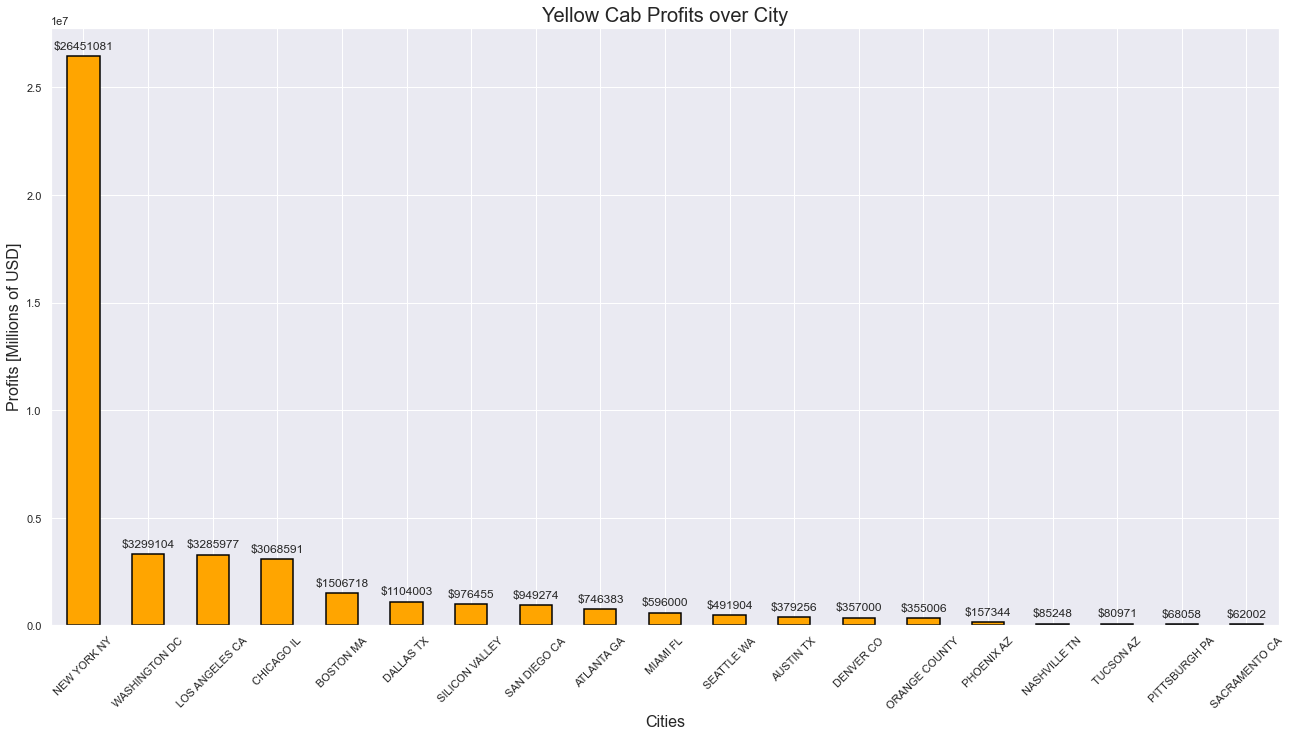

In [52]:
#Average profits per City
ppc= yellowcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'orange',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
add_value_labels(fig)

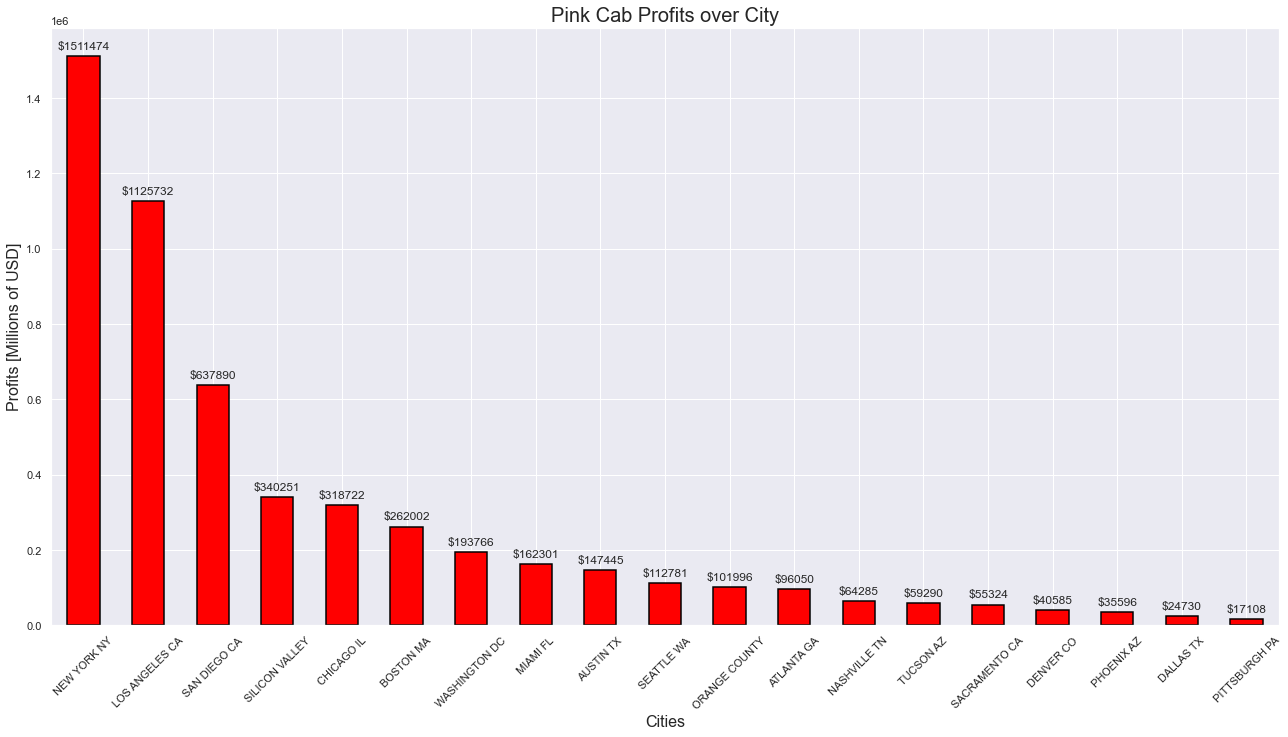

In [53]:
ppc= pinkcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'red',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
add_value_labels(fig)

In [54]:
#Profitable Rides % Citywise
yellowcabnp=yellowcab[(yellowcab['Profit']<0)]
yellowcabnp= yellowcabnp.City.value_counts()
yellowcabnp=pd.DataFrame(yellowcabnp)
yellowcabnp.columns=['q']
pinkcabnp=pinkcab[(pinkcab['Profit']<0)]
pinkcabnp= pinkcabnp.City.value_counts()
pinkcabnp=pd.DataFrame(pinkcabnp)
pinkcabnp.columns=['q']

yellowcabnp['Q']= yellowcab.City.value_counts() - yellowcabnp['q']
yellowcabnp['per']= ((1- (yellowcabnp['q'] / (yellowcabnp['q']+yellowcabnp['Q'])))*100)
yellowcabnp= yellowcabnp[['Q','q','per']]
yellowcabnp['Q']= yellowcabnp['Q'].astype(int)
yellowcabnp = yellowcabnp.sort_values(by='per', ascending= False )
print(yellowcabnp.head(30))
print(yellowcabnp.shape)
pinkcabnp['Q']= pinkcab.City.value_counts() - pinkcabnp['q']
pinkcabnp['per']= ((1- (pinkcabnp['q'] / (pinkcabnp['q']+pinkcabnp['Q'])))*100)
pinkcabnp= pinkcabnp[['Q','q','per']]
pinkcabnp['Q']= pinkcabnp['Q'].astype(int)
pinkcabnp = pinkcabnp.sort_values(by='per', ascending= False )
print(pinkcabnp.head(30))
print(pinkcabnp.shape)

                    Q     q        per
DALLAS TX        5636     1  99.982260
DENVER CO        2400    31  98.724805
MIAMI FL         4387    65  98.539982
ATLANTA GA       5709    86  98.515962
LOS ANGELES CA  27505   663  97.646265
PHOENIX AZ       1170    30  97.500000
ORANGE COUNTY    2406    63  97.448360
AUSTIN TX        2937    91  96.994716
SAN DIEGO CA     9474   342  96.515892
SEATTLE WA       5014   251  95.232669
WASHINGTON DC   37273  2772  93.077787
PITTSBURGH PA     564    67  89.381933
CHICAGO IL      41571  5693  87.954892
NASHVILLE TN     1026   143  87.767322
BOSTON MA       21492  3014  87.700971
TUCSON AZ         963   169  85.070671
SACRAMENTO CA     824   209  79.767667
(17, 3)
                    Q     q        per
SILICON VALLEY   3680   117  96.918620
NEW YORK NY     13514   453  96.756641
AUSTIN TX        1719   149  92.023555
SAN DIEGO CA     9750   922  91.360570
ORANGE COUNTY    1346   167  88.962327
WASHINGTON DC    3263   429  88.380282
LOS ANGELES CA  1

Text(0.5, 0, 'Cities')

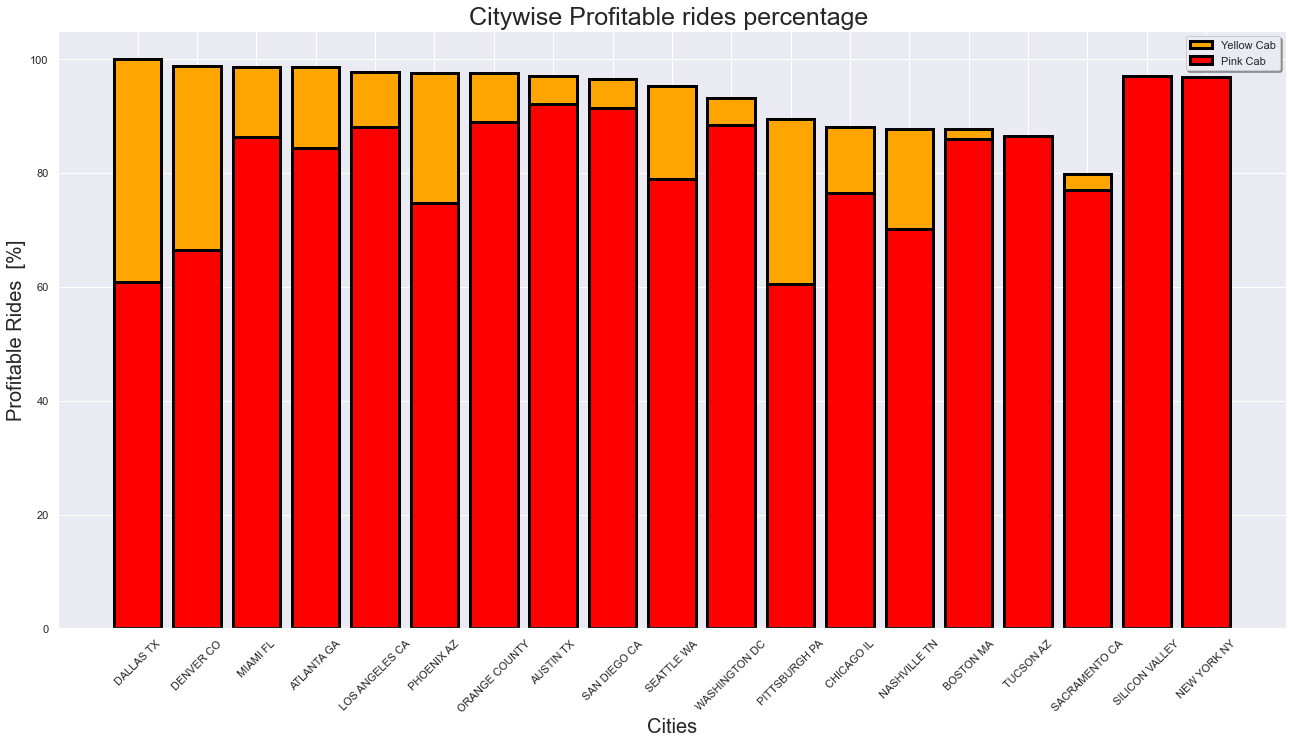

In [55]:
plt.figure(figsize=(22,11))
plt.bar(x= yellowcabnp.index, height='per', data = yellowcabnp,edgecolor = 'black',color = 'orange',linewidth=3,label='Yellow Cab',)
plt.bar(x= pinkcabnp.index, height='per', data = pinkcabnp,edgecolor = 'black',color = 'red',linewidth=3,label='Pink Cab',)
plt.xticks(rotation=45)
plt.ylabel('Profitable Rides  [%]', fontsize=20)
plt.title('Citywise Profitable rides percentage ', fontsize = 25)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=20)

In [56]:
#Demand Analysis
def add_value_labels1(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels1(ax)

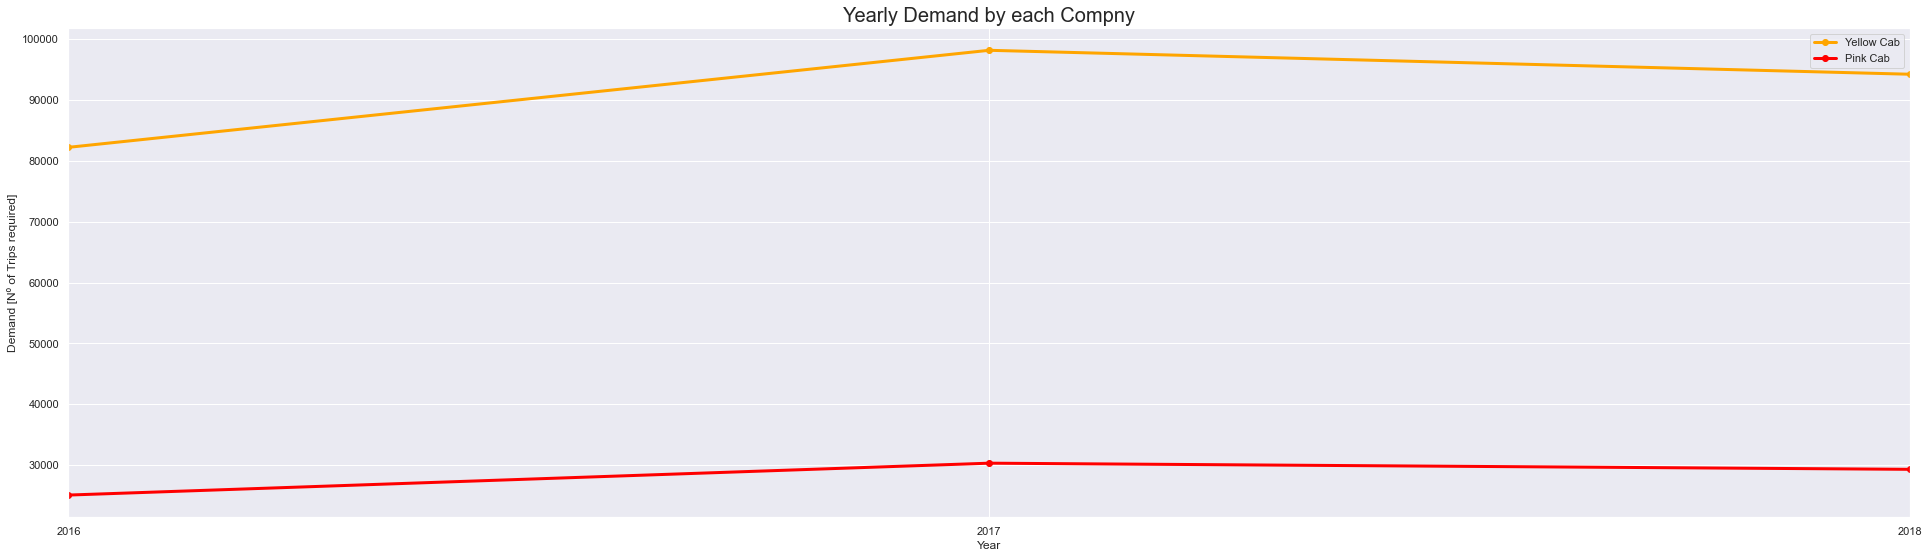

In [57]:
plt.figure(figsize=(33,9))

yellowcab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'orange',linewidth =3,marker='o')
pinkcab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'red',linewidth =3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Yearly Demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Year')

plt.show()

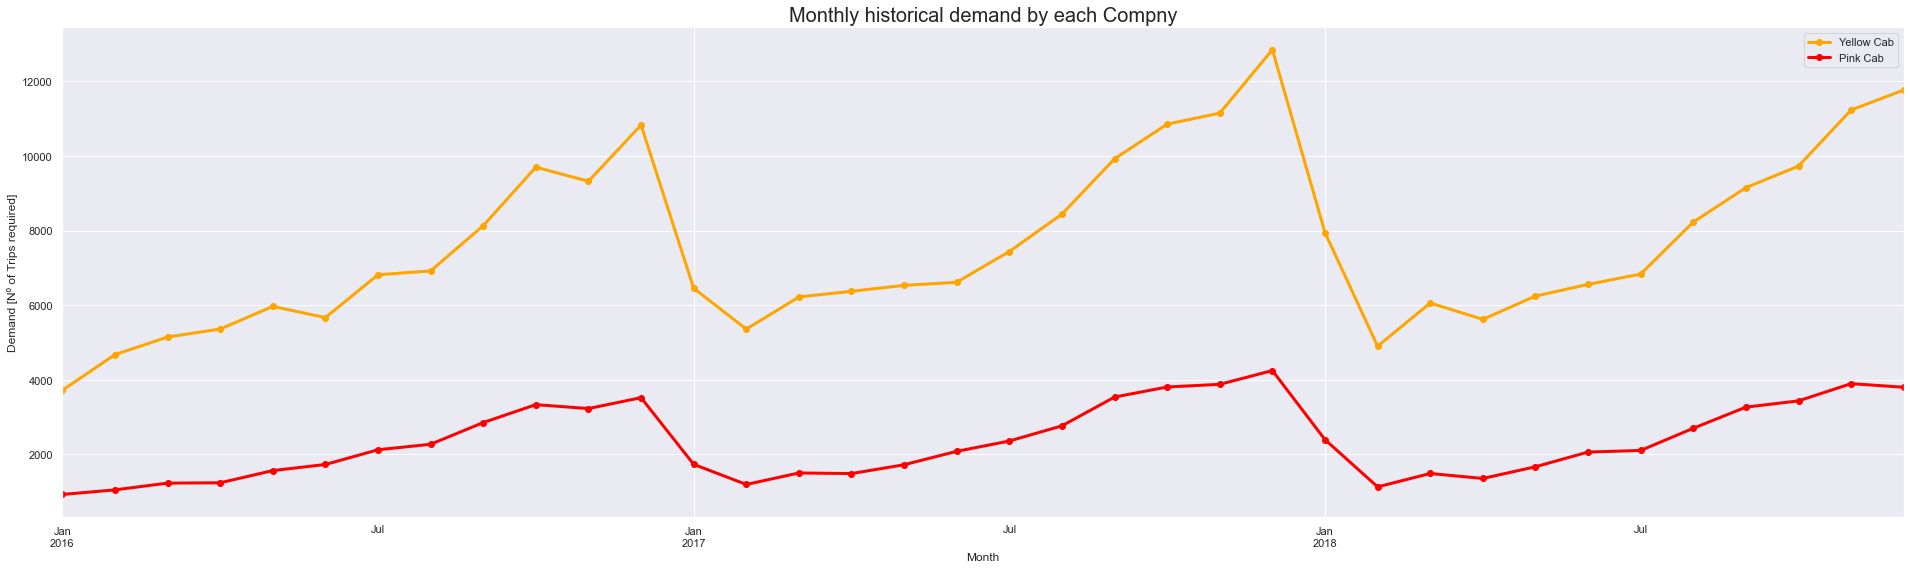

In [58]:
plt.figure(figsize=(33,9))

yellowcab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'orange',label='Yellow Cab Company',linewidth=3, marker='o')
pinkcab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'red',label='Pink Cab Company',linewidth=3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Monthly historical demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Month')
plt.show()

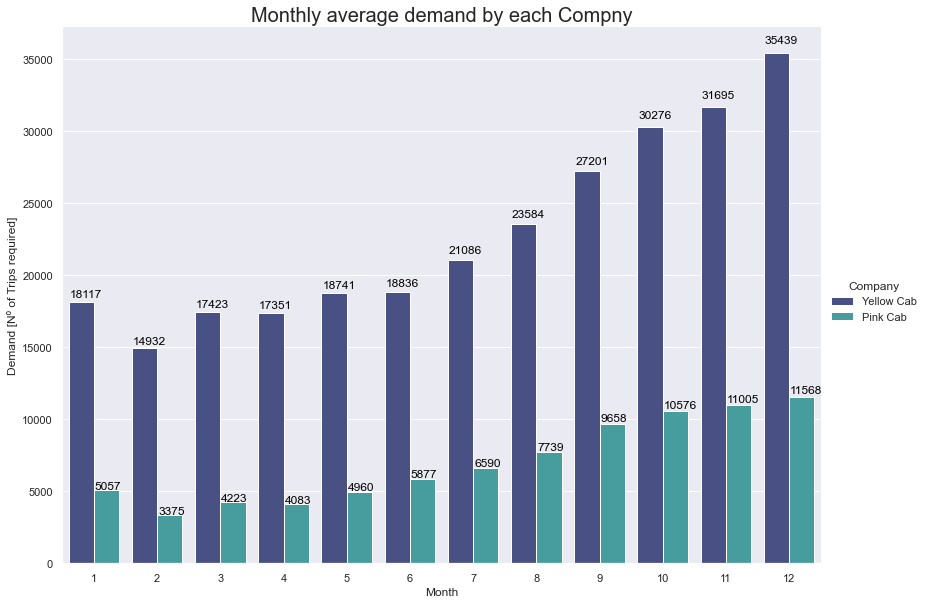

In [59]:
dpm=masterdata.groupby(['Company','Month of Travel'])['Transaction ID'].agg(['count'])
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)
dpm = dpm.sort_values(by='count', ascending= False )

g=sns.catplot('Month of Travel','count',data=dpm,kind='bar',hue='Company',palette = 'mako', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Monthly average demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Month')
plt.show()

In [60]:
a1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
a2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
a3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
a4=masterdata[(masterdata['Age']>60)]

a11= a1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Year of Travel', col_level=1)
a11=a11.reset_index(level='Company', col_level=1)
a11['Class']= '18-25'
a22= a2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Year of Travel', col_level=1)
a22=a22.reset_index(level='Company', col_level=1)
a22['Class']= '26-40'
a33= a3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Year of Travel', col_level=1)
a33=a33.reset_index(level='Company', col_level=1)
a33['Class']= '40-60'
a44= a4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Year of Travel', col_level=1)
a44=a44.reset_index(level='Company', col_level=1)
a44['Class']= '60+'

agegroup=a11
agegroup=pd.concat([agegroup,a22,a33,a44])
agegroup['Total Customers']=agegroup['Total Customers'].astype(int)
agegroup.head(5)

,Company,Year of Travel,Total Customers,Class
0,Pink Cab,2016,4844,18-25
1,Pink Cab,2017,6009,18-25
2,Pink Cab,2018,5777,18-25
3,Yellow Cab,2016,16046,18-25
4,Yellow Cab,2017,19263,18-25


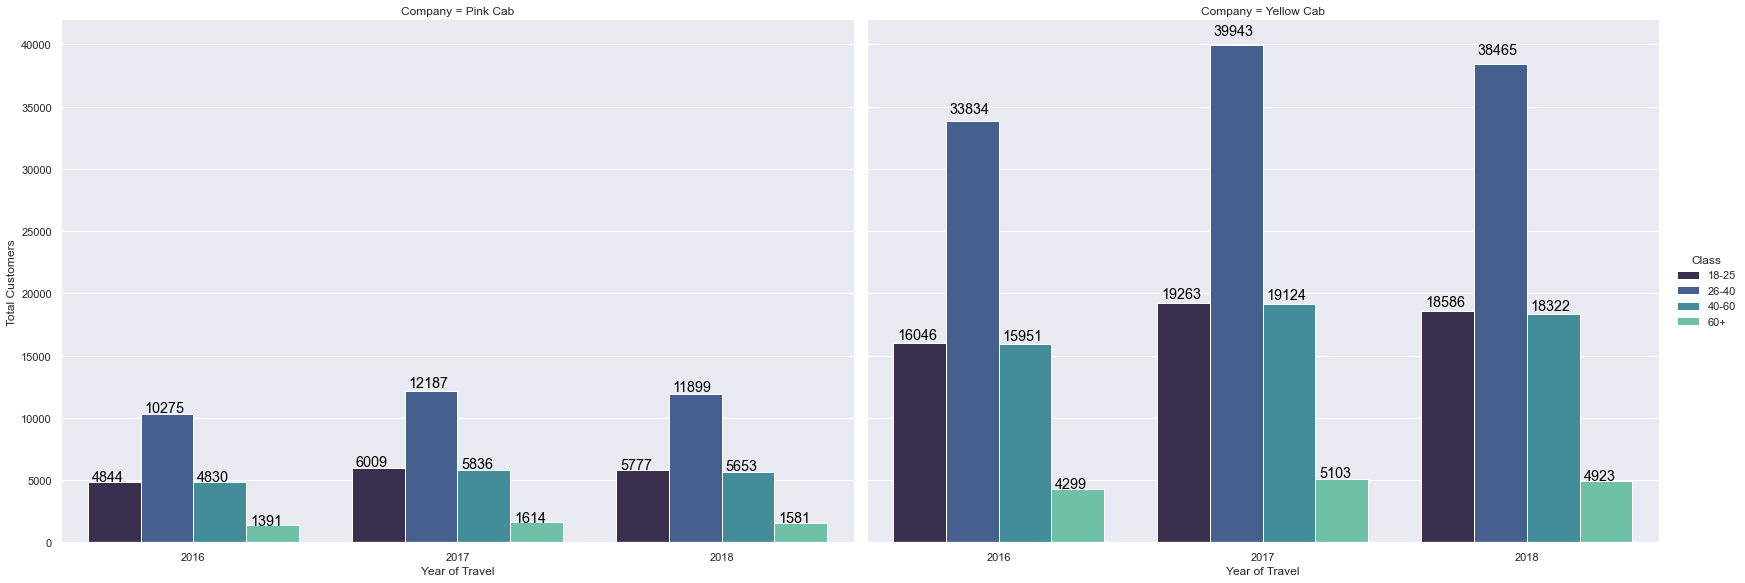

In [61]:
g=sns.catplot('Year of Travel','Total Customers',data=agegroup,col= 'Company',kind='bar',hue='Class',palette = 'mako', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

In [62]:
a=agegroup.groupby(['Company', 'Year of Travel'])['Total Customers'].sum().to_frame('Total')
a.head(6)

Total
Company    Year of Travel       
Pink Cab   2016            21340
           2017            25646
           2018            24910
Yellow Cab 2016            70130
           2017            83433
           2018            80296

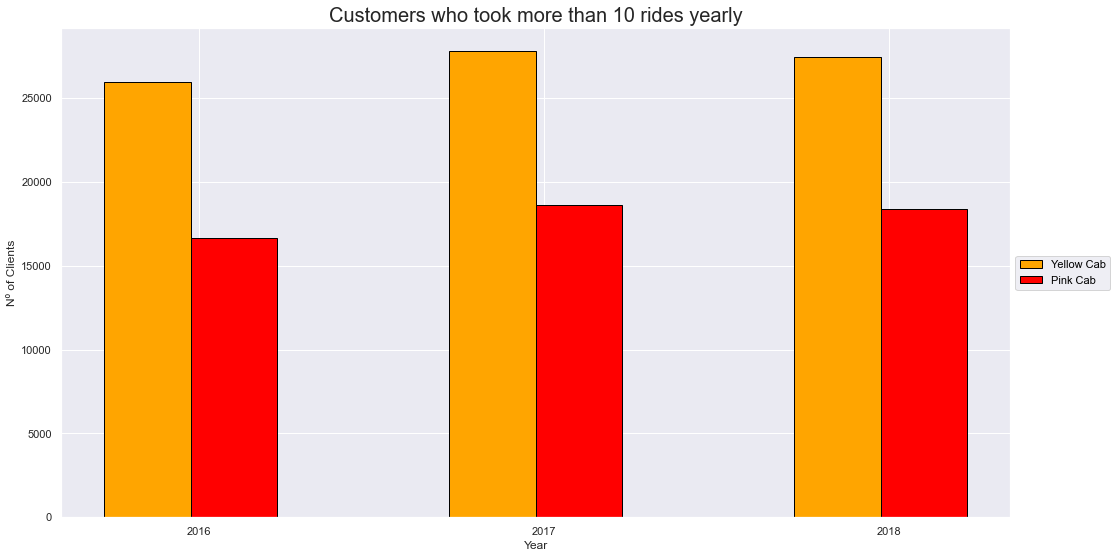

In [63]:
#Loyalty Rates

years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_y.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='orange', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='red',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides yearly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

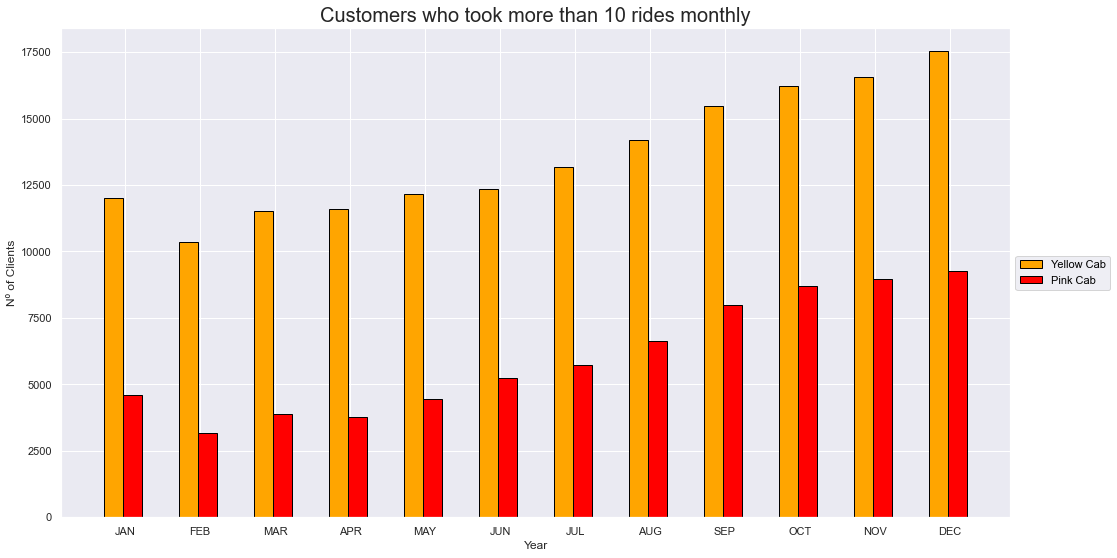

In [64]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
c10r_ym=[]
c10r_pm=[]
for month in months:
  yellow_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_ym.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_pm.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(12)
plt.bar(X+0.00,c10r_ym,color='orange', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_pm,color='red',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides monthly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

In [65]:
#Payment Mode
u=masterdata.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
u.columns = ['RidesPerYear']
u=u.reset_index(level='Year of Travel', col_level=1)
payment=masterdata.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])
payment=payment.reset_index(level='Year of Travel', col_level=1)
payment=payment.reset_index(level='Payment_Mode', col_level=1)
payment=payment.merge(u,on= 'Year of Travel')
print(payment.head())
payment1=payment
payment1['per']=payment1['count']/payment1['RidesPerYear']

  Payment_Mode  Year of Travel  count  RidesPerYear
0         Card            2016  64339        107319
1         Cash            2016  42980        107319
2         Card            2017  76963        128510
3         Cash            2017  51547        128510
4         Card            2018  74202        123563


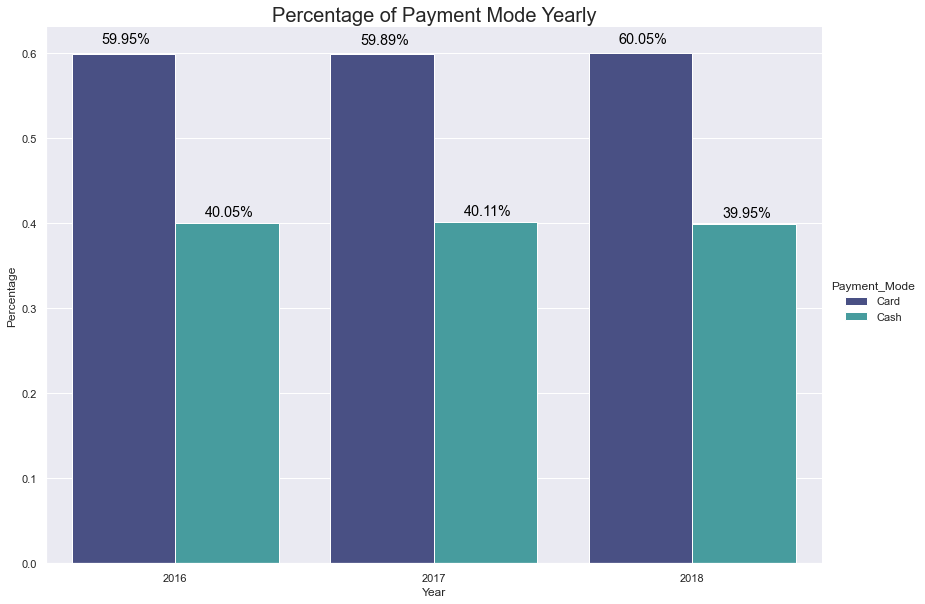

In [66]:
g=sns.catplot('Year of Travel','per',data=payment1,kind='bar',hue='Payment_Mode',palette="mako", height=8.27, aspect=11.7/8.27)
plt.title('Percentage of Payment Mode Yearly',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')
plt.show()

In [67]:
payment2=masterdata.groupby(['Year of Travel','Payment_Mode','City'])['Transaction ID'].agg(['count'])
payment2=payment2.reset_index(level='Year of Travel', col_level=1)
payment2=payment2.reset_index(level='Payment_Mode', col_level=1)
payment2=payment2.reset_index(level='City', col_level=1)
payment2 = payment2.sort_values(by='count', ascending= False )
payment2.head()

,City,Payment_Mode,Year of Travel,count
47,NEW YORK NY,Card,2017,21623
85,NEW YORK NY,Card,2018,20354
9,NEW YORK NY,Card,2016,17773
66,NEW YORK NY,Cash,2017,14516
104,NEW YORK NY,Cash,2018,13748


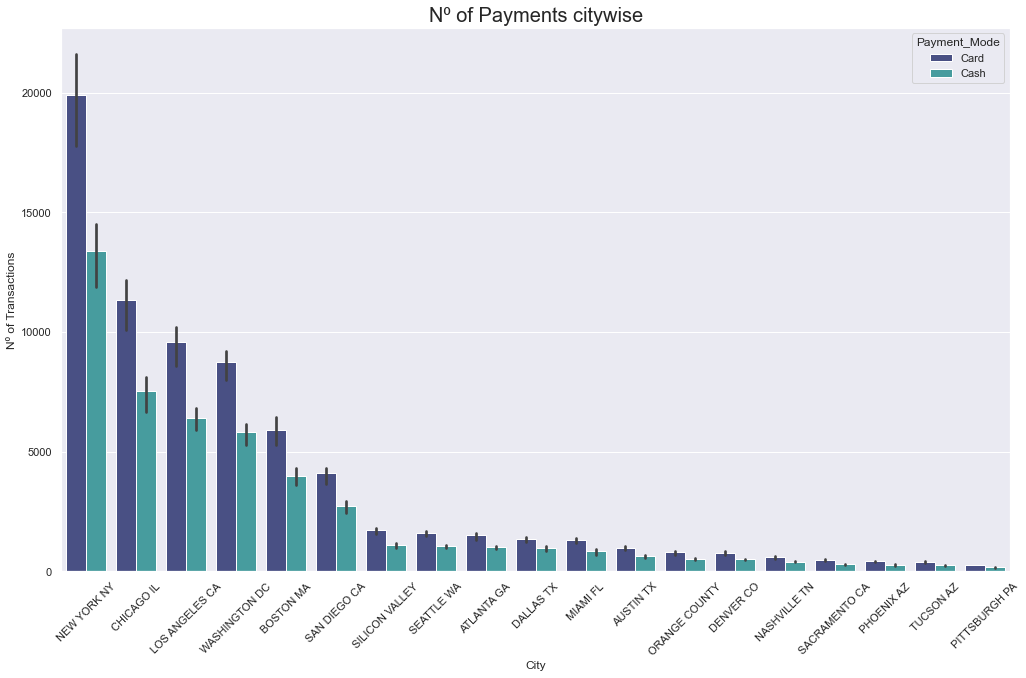

In [68]:
fig, ax = plt.subplots(figsize = (17, 10))

sns.barplot('City','count',data=payment2,hue='Payment_Mode',palette="mako")
plt.title('Nº of Payments citywise',fontsize=20)
plt.xlabel('City')
plt.ylabel('Nº of Transactions')
plt.xticks(rotation=45)
plt.show()

In [69]:
a1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
a2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
a3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
a4=masterdata[(masterdata['Age']>60)]

a11= a1.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Payment_Mode', col_level=1)
a11['Class']= '18-25'


a22= a2.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Payment_Mode', col_level=1)
a22['Class']= '26-40'


a33= a3.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Payment_Mode', col_level=1)
a33['Class']= '40-60'


a44= a4.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Payment_Mode', col_level=1)
a44['Class']= '60+'

payage=a11
payage=pd.concat([payage,a22,a33,a44])
payage.head()

x=payage.groupby('Class').sum()
x.columns=['Q']
x=x.reset_index(level='Class', col_level=1)
x.head()

payage=payage.merge(x,on='Class')
payage['per'] = payage['Total Customers']/payage['Q']
payage.head()

,Payment_Mode,Total Customers,Class,Q,per
0,Card,42308,18-25,70525,0.599901
1,Cash,28217,18-25,70525,0.400099
2,Card,87745,26-40,146603,0.598521
3,Cash,58858,26-40,146603,0.401479
4,Card,41843,40-60,69716,0.600192


<Figure size 2520x1080 with 0 Axes>

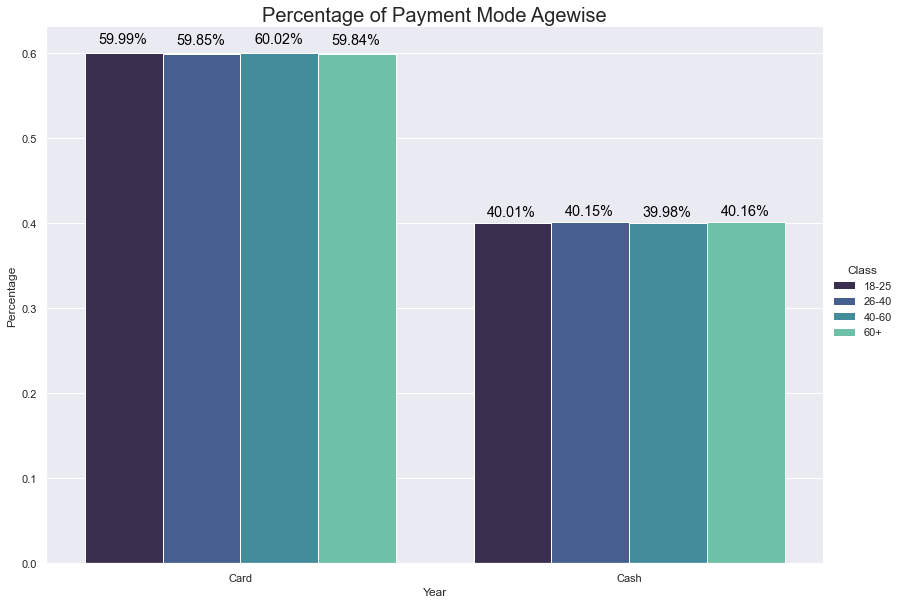

In [70]:
plt.figure(figsize=(35,15))
g=sns.catplot('Payment_Mode','per',data=payage,kind='bar',hue='Class', palette='mako', height=8.27, aspect=11.7/8.27)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.035, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')
plt.title('Percentage of Payment Mode Agewise',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()